### Install Dependencies

In [80]:
#%pip install pandas
#%pip install matplotlib
#%pip install python-dotenv
#%pip install coinbase-advanced-py

### Import dependencies

In [81]:
import os
import pandas as pd  
import matplotlib.pyplot as plt
from coinbase.rest import RESTClient
from dotenv import load_dotenv
import json
import time
import matplotlib.pyplot as plt
from datetime import datetime, time

client = RESTClient() # Uses environment variables for API key and secretimport os

In [82]:
load_dotenv()

api_secret = os.getenv('CB_PRIVATE_KEY')
api_key = os.getenv('CB_KEY_NAME')

client = RESTClient(api_key=api_key, api_secret=api_secret) # Uses environment variables for API key and secretimport os


In [83]:
# Provided datetime string
date_string = "2025-01-04 06:38:20.767435+00:00"

# Convert to a datetime object
dt = datetime.fromisoformat(date_string)

# Convert to Unix timestamp in seconds
unix_timestamp = int(dt.timestamp())
print(unix_timestamp)

1735972700


In [84]:
total_trades = []
start_time = 1735972700
limit = 455066
interval = 15
count = 0

while start_time > 1733977539:
    count += 1
    trades = client.get_market_trades('ETH-USD', 1, start_time, start_time + 1)
    try:
        total_trades.append(trades['trades'][0])
        start_time = start_time - interval
    except IndexError as e:
        #print(f'Index error, adding response right to list. Count: {count}')
        start_time = start_time - 1
    
    if(count % 1000 == 0):
        print(f'Completed {count+1}/{limit} queries')

Completed 1001/455066 queries
Completed 2001/455066 queries
Completed 3001/455066 queries
Completed 4001/455066 queries
Completed 5001/455066 queries
Completed 6001/455066 queries
Completed 7001/455066 queries
Completed 8001/455066 queries
Completed 9001/455066 queries
Completed 10001/455066 queries
Completed 11001/455066 queries
Completed 12001/455066 queries
Completed 13001/455066 queries
Completed 14001/455066 queries
Completed 15001/455066 queries
Completed 16001/455066 queries
Completed 17001/455066 queries
Completed 18001/455066 queries
Completed 19001/455066 queries


KeyboardInterrupt: 

In [74]:
len(total_trades)

60306

In [75]:
str_trades = str(total_trades)
# Replace single quotes with double quotes to make it JSON-compatible
data_string_fixed = str_trades.replace("'", '"')

# Convert the string to a proper Python list of dictionaries
data_list = json.loads(data_string_fixed)

In [76]:
df_trades = pd.DataFrame(data_list)
df_trades

,trade_id,product_id,price,size,time,side,bid,ask,exchange
0,594125392,ETH-USD,3219.83,0.00015527,2025-01-15T01:18:11.200565Z,SELL,,,
1,594125345,ETH-USD,3220.13,0.00083946,2025-01-15T01:17:54.794970Z,SELL,,,
2,594125295,ETH-USD,3220.13,0.06692684,2025-01-15T01:17:39.905365Z,SELL,,,
3,594125248,ETH-USD,3221.64,0.48776198,2025-01-15T01:17:24.765710Z,BUY,,,
4,594125125,ETH-USD,3223.96,0.03467153,2025-01-15T01:17:09.986433Z,BUY,,,
...,...,...,...,...,...,...,...,...,...
60301,590641382,ETH-USD,3597.72,0.2,2025-01-04T06:39:29.902680Z,SELL,,,
60302,590641361,ETH-USD,3597.71,0.00098667,2025-01-04T06:39:14.353069Z,BUY,,,
60303,590641344,ETH-USD,3598.15,3.56557077,2025-01-04T06:38:55.779501Z,BUY,,,
60304,590641310,ETH-USD,3598.95,0.00247882,2025-01-04T06:38:35.543964Z,SELL,,,


/var/folders/1f/5lhk7sb97rz53v7gk1vkcjkr0000gn/T/ipykernel_22113/3006657511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trades['price'] = pd.to_numeric(df_trades['price'])


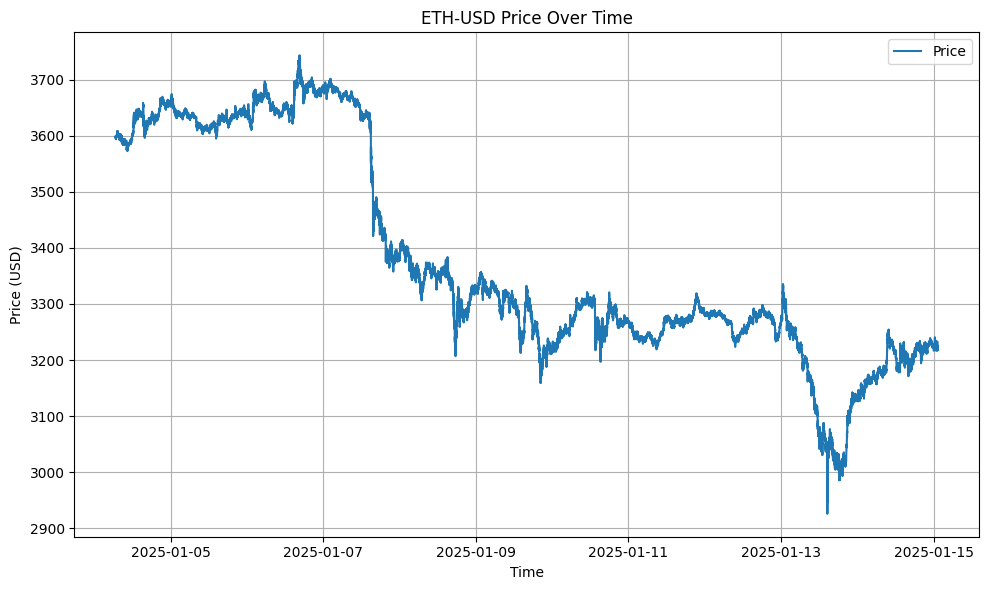

In [77]:
# Convert 'time' to datetime, coercing errors
df_trades['time'] = pd.to_datetime(df_trades['time'], errors='coerce')

# Drop rows where 'time' is NaT (invalid date)
df_trades = df_trades.dropna(subset=['time'])

# Convert 'price' column to numeric
df_trades['price'] = pd.to_numeric(df_trades['price'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_trades['time'], df_trades['price'], linestyle='-', label='Price')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('ETH-USD Price Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [78]:
df_trades.to_csv('newer_trades.csv')